In [2]:
import pandas as pd
df = pd.read_csv('spange_melt.csv')

dictionary = {
}
solvent_types = df['solvent'].to_list()
SMILES = df['SMILES'].to_list()

for i in range(len(SMILES)):
    dictionary[SMILES[i]] = solvent_types[i]

print(dictionary)

{'C1CCCCC1': 'alkane', 'CC(=O)N(C)C': 'amide', 'CC(=O)O': 'carboxylic_acid', 'CCC(=O)OC': 'ester', 'CCOC(C)=O': 'ester', 'COC(=O)OC': 'ester', 'C1CCOC1': 'ether', 'CC1CCCO1': 'ether', 'CCOCC': 'ether', 'COC(C)(C)C': 'ether', 'CCC(C)=O': 'ketone', 'O=C1CC[C@H]2CO[C@@H]1O2': 'ketone', 'CC(C)(C)O': 'monohydric_alcohol', 'CC(C)O': 'monohydric_alcohol', 'CCCCCCCCCCO': 'monohydric_alcohol', 'CCO': 'monohydric_alcohol', 'CCOC(=O)C(C)O': 'monohydric_alcohol', 'CO': 'monohydric_alcohol', 'OC(C(F)(F)F)C(F)(F)F': 'monohydric_alcohol', 'OCC(F)(F)F': 'monohydric_alcohol', 'CC#N': 'nitrile', 'O': 'polyhydric_alcohol', 'OCCO': 'polyhydric_alcohol'}


In [3]:
from catechol.data.loader import (
    generate_leave_one_out_splits,
    load_single_solvent_data,
    replace_repeated_measurements_with_average,
)

single_solvent = load_single_solvent_data()
X = single_solvent[[
    "Residence Time", "Temperature", "Reaction SMILES",
    "SOLVENT SMILES", "SOLVENT NAME", "SOLVENT Ratio"
]]
Y = single_solvent[["SM", "Product 2", "Product 3"]]

data_df = pd.concat([X, Y], axis=1)
data_df['Product 2 + product 3'] = data_df['Product 2'] + data_df['Product 3']
min_SM = data_df[['SOLVENT SMILES', 'SM']]

# 2. Create the new DataFrame containing only the desired columns
# The list of columns is ['SOLVENT SMILES', 'Product 2 + product 3']
new_df = data_df[['SOLVENT SMILES', 'Product 2 + product 3']]

# Group the new_df by 'SOLVENT SMILES'
# and then find the maximum value in the 'Product 2 + product 3' column for each group.
# Finally, convert the resulting Series to a dictionary.
max_yield_dict = new_df.groupby('SOLVENT SMILES')['Product 2 + product 3'].max().to_dict()
min_SM_dict = min_SM.groupby('SOLVENT SMILES')['SM'].min().to_dict()
print(max_yield_dict)
print(min_SM_dict)

ratio_dict = {
}

for key, value in max_yield_dict.items():
    ratio = value/(value + min_SM_dict[key])
    ratio_dict[key] = ratio

print(ratio_dict)

median_yield_dict = new_df.groupby('SOLVENT SMILES')['Product 2 + product 3'].median().to_dict()

# Calculate the median of 'SM' for each 'SOLVENT SMILES' group
median_SM_dict = min_SM.groupby('SOLVENT SMILES')['SM'].median().to_dict()

print("Median Yield Dictionary:")
print(median_yield_dict)
print("\nMedian SM Dictionary:")
print(median_SM_dict)

med_ratio_dict = {}

# Iterate through the keys and values of the median_yield_dict
for key, value in median_yield_dict.items():
    # Ensure the key also exists in the median_SM_dict to avoid a KeyError
    if key in median_SM_dict:
        # Calculate the ratio using the median values
        ratio = value / (value + median_SM_dict[key])
        med_ratio_dict[key] = ratio

print("\nRatio Dictionary (using medians):")
print(med_ratio_dict)


# Assuming new_df and min_SM are already defined pandas DataFrames

# Calculate the mean of 'Product 2 + product 3' for each 'SOLVENT SMILES' group
mean_yield_dict = new_df.groupby('SOLVENT SMILES')['Product 2 + product 3'].mean().to_dict()

# Calculate the mean of 'SM' for each 'SOLVENT SMILES' group
mean_SM_dict = min_SM.groupby('SOLVENT SMILES')['SM'].mean().to_dict()

print("Mean Yield Dictionary:")
print(mean_yield_dict)
print("\nMean SM Dictionary:")
print(mean_SM_dict)

mean_ratio_dict = {}

# Iterate through the keys and values of the mean_yield_dict
for key, value in mean_yield_dict.items():
    # Ensure the key also exists in the mean_SM_dict to avoid a KeyError
    if key in mean_SM_dict:
        # Calculate the ratio using the mean values
        ratio = value / (value + mean_SM_dict[key])
        mean_ratio_dict[key] = ratio

print("\nRatio Dictionary (using means):")
print(mean_ratio_dict)

{'C(C(F)(F)F)(C(F)(F)F)O': 0.8009880342431233, 'C1CCCCC1': 0.5224429181148627, 'C1CCOC1': 0.4623411434251476, 'CC#N': 0.6053347263323902, 'CC#N.CC(=O)O': 0.0641299963479116, 'CC(C)(C)O': 0.19058036798978462, 'CC(C)(C)OC': 0.1037727520649682, 'CC(O)C': 0.8544404745941441, 'CCC(=O)C': 0.11687113616050951, 'CCCCCCCCCCO': 0.8032877518592167, 'CCOC(=O)C(C)O': 0.3138329262265084, 'CCOCC': 0.40978743271984097, 'CN(C)C(C)=O': 0.5087426077797614, 'CO': 0.6529608240220712, 'COC(=O)OC': 0.1085030401503261, 'O.CC#N': 0.8894482081597888, 'O.OCC(F)(F)F': 0.6947144543369447, 'O1C(C)CCC1': 0.5557530552270729, 'O=C(OC)CC': 0.0578773585593338, 'O=C(OCC)C': 0.10130152662696029, 'OCC': 0.735470792873231, 'OCC(F)(F)F': 0.4148861908297234, 'OCCO': 0.997399548022839, '[C@H]12CCC([C@H](OC1)O2)=O': 0.41239213993039037}
{'C(C(F)(F)F)(C(F)(F)F)O': 0.0, 'C1CCCCC1': 0.2292552231874948, 'C1CCOC1': 0.1870473754706084, 'CC#N': 0.1320261327971227, 'CC#N.CC(=O)O': 0.0, 'CC(C)(C)O': 0.6525019682678372, 'CC(C)(C)OC': 0.8

26
['CO', 'OCCO', 'C(C(F)(F)F)(C(F)(F)F)O', 'O1C(C)CCC1', 'C1CCCCC1', 'CC(O)C', 'O.CC#N', 'CC#N', 'CC#N.CC(=O)O', 'CCOCC', 'OCC(F)(F)F', 'O.OCC(F)(F)F', 'CN(C)C(C)=O', 'CCCCCCCCCCO', 'OCC', 'C1CCOC1', '[C@H]12CCC([C@H](OC1)O2)=O', 'O=C(OCC)C', 'CC(C)(C)OC', 'CCC(=O)C', 'CC(C)(C)O', 'COC(=O)OC', 'O=C(OC)CC', 'CCOC(=O)C(C)O'] 24


MovieWriter ffmpeg unavailable; using Pillow instead.


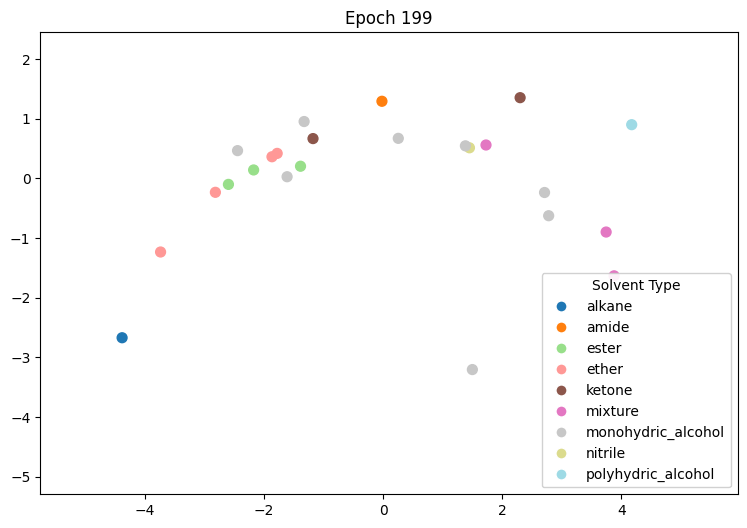

In [4]:
import json
import glob
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D

from rdkit import Chem
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from matplotlib.animation import FuncAnimation

def canonicalize_smiles_with_enhanced_stereo(smiles):
    """
    Canonicalize a SMILES string, preserving enhanced stereochemistry for mixtures.
    """
    mol = Chem.MolFromSmiles(smiles, sanitize=True)
    if mol is None:
        return smiles  # return unchanged if invalid
    # Preserve enhanced stereo (important for mixtures)
    return Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)

def process_embeddings(input_dir, smiles_to_type, save_path=None):
    """
    Loads, processes, and animates PCA of embeddings from a specified directory.
    Colors points by solvent type (from smiles_to_type mapping) and includes a legend.

    Args:
        input_dir (str): Directory containing the JSON embedding files.
        smiles_to_type (dict): Mapping from SMILES to solvent type.
        save_path (str, optional): Path to save the animation.
    """
    # Step 0: Canonicalize SMILES in mapping
    smiles_to_type_canon = {
        canonicalize_smiles_with_enhanced_stereo(s): t
        for s, t in smiles_to_type.items()
    }

    # Step 1: Load embeddings
    all_embeddings = []
    epochs = []
    solvent_ids = None

    files = sorted(
        glob.glob(f"{input_dir}/fingerprints_batch_*.json"),
        key=lambda f: int(f.split("_")[-1].split(".")[0])
    )

    epoch_data = {}
    count = 0
    for f in files:
        epoch = int(f.split("_")[-1].split(".")[0])
        with open(f) as fp:
            data = json.load(fp)
        if solvent_ids is None:
            solvent_ids = list(data.keys())
            if count == 0:
                print(solvent_ids, len(solvent_ids))
                count += 1
        embeddings = np.array([data[s] for s in solvent_ids])
        all_embeddings.append(embeddings)
        epochs.append(epoch)
        epoch_data[epoch] = embeddings

    # Step 2: PCA on all epochs combined
    X_all = np.vstack(all_embeddings)
    pca = PCA(n_components=2)
    pca.fit(X_all)

    # Step 3: Transform and store
    plot_df = []
    for epoch in epochs:
        coords = pca.transform(epoch_data[epoch])
        for sid, (pc1, pc2) in zip(solvent_ids, coords):
            sid_canon = canonicalize_smiles_with_enhanced_stereo(sid)
            solvent_type = smiles_to_type_canon.get(sid_canon, "unknown")
            plot_df.append({
                "epoch": epoch,
                "solvent": sid_canon,
                "type": solvent_type,
                "PC1": pc1,
                "PC2": pc2
            })
    plot_df = pd.DataFrame(plot_df)

    # Step 4: Assign a fixed color per solvent type
    solvent_types = sorted(plot_df["type"].unique())
    cmap = plt.get_cmap("tab20", len(solvent_types))
    color_map = {stype: cmap(i) for i, stype in enumerate(solvent_types)}

     # Step 5: Set up animation
    fig, ax = plt.subplots(figsize=(9, 6))  # wider figure so legend fits
    scat = ax.scatter([], [], s=50)

    ax.set_xlim(plot_df["PC1"].min() - 1, plot_df["PC1"].max() + 1)
    ax.set_ylim(plot_df["PC2"].min() - 1, plot_df["PC2"].max() + 1)
    title = ax.set_title("")

    # Add legend for solvent types - positioned in bottom right corner
    legend_elements = [
        Line2D([0], [0], marker='o', color='w',
               markerfacecolor=color_map[stype], markersize=8, label=stype)
        for stype in solvent_types
    ]
    ax.legend(
        handles=legend_elements,
        title="Solvent Type",
        loc='lower right',
        framealpha=0.9  # slight transparency so you can see points behind
    )

    def init():
        scat.set_offsets(np.empty((0, 2)))
        return scat, title

    def update(frame_idx):
        epoch = epochs[frame_idx]
        df_e = plot_df[plot_df.epoch == epoch]
        coords = df_e[["PC1", "PC2"]].values
        colors = [color_map[stype] for stype in df_e["type"]]
        scat.set_offsets(coords)
        scat.set_color(colors)
        title.set_text(f"Epoch {epoch}")
        return scat, title

    ani = FuncAnimation(fig, update, frames=len(epochs),
                        init_func=init, blit=True, repeat=True, interval=500)

    if save_path:
        ani.save(save_path, dpi=150)
    else:
        plt.show()



# Example usage:
smiles_to_type = {
    'C1CCCCC1': 'alkane', 'CC(=O)N(C)C': 'amide', 'CC(=O)O': 'carboxylic_acid',
    'CCC(=O)OC': 'ester', 'CCOC(C)=O': 'ester', 'COC(=O)OC': 'ester',
    'C1CCOC1': 'ether', 'CC1CCCO1': 'ether', 'CCOCC': 'ether', 'COC(C)(C)C': 'ether',
    'CCC(C)=O': 'ketone', 'O=C1CC[C@H]2CO[C@@H]1O2': 'ketone',
    'CC(C)(C)O': 'monohydric_alcohol', 'CC(C)O': 'monohydric_alcohol', 'CCCCCCCCCCO': 'monohydric_alcohol',
    'CCO': 'monohydric_alcohol', 'CCOC(=O)C(C)O': 'monohydric_alcohol', 'CO': 'monohydric_alcohol',
    'OC(C(F)(F)F)C(F)(F)F': 'monohydric_alcohol', 'OCC(F)(F)F': 'monohydric_alcohol',
    'CC#N': 'nitrile', 'O': 'polyhydric_alcohol', 'OCCO': 'polyhydric_alcohol', 'CC#N.CC(=O)O': 'mixture',
    'O.CC#N': 'mixture',
    'O.OCC(F)(F)F': 'mixture'
}
print(len(list(smiles_to_type.keys())))
process_embeddings("solvent_fps_fig_FP", smiles_to_type, save_path="pca_by_type_with_legend.gif")

In [36]:
def canonicalize_smiles_with_enhanced_stereo(smiles):
    """
    Canonicalize a SMILES string, preserving enhanced stereochemistry for mixtures.
    """
    mol = Chem.MolFromSmiles(smiles, sanitize=True)
    if mol is None:
        return smiles  # return unchanged if invalid
    # Preserve enhanced stereo (important for mixtures)
    return Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)

def save_combined_frames(plot_df, explained_variance_pc1, explained_variance_pc2, epochs_to_save, 
                        output_dir="specific_frames", filename="combined_frames_FP.pdf", show_labels=True):
    """
    Saves a combined figure with multiple PCA frames (epochs) side by side.
    """
    plt.rcParams['font.size'] = 32
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Base size: keep original subplot widths, add extra space for colorbar
    fig_width = 9 * len(epochs_to_save) + 1.2  # +1.2 inches just for cbar
    fig, axes = plt.subplots(1, len(epochs_to_save), figsize=(fig_width, 8), constrained_layout=True)
    
    # Handle case where there's only one subplot
    if len(epochs_to_save) == 1:
        axes = [axes]
    
    # Global min/max for consistent color scaling and padding
    all_yields, all_pc1, all_pc2, valid_epochs = [], [], [], []
    for epoch in epochs_to_save:
        df_e = plot_df[plot_df.epoch == epoch]
        if not df_e.empty:
            all_yields.extend(df_e["yield"].values)
            all_pc1.extend(df_e["PC1"].values)
            all_pc2.extend(df_e["PC2"].values)
            valid_epochs.append(epoch)
        else:
            print(f"No data for epoch {epoch}, skipping.")
    
    if not valid_epochs:
        print("No valid epochs found.")
        return
    
    yield_min, yield_max = min(all_yields), max(all_yields)
    pc1_min, pc1_max = min(all_pc1), max(all_pc1)
    pc2_min, pc2_max = min(all_pc2), max(all_pc2)
    
    x_padding = (pc1_max - pc1_min) * 0.05
    y_padding = (pc2_max - pc2_min) * 0.05
    
    scatters = []
    for i, epoch in enumerate(valid_epochs):
        df_e = plot_df[plot_df.epoch == epoch]
        coords = df_e[["PC1", "PC2"]].values
        yield_values = df_e["yield"].values
        solvents = df_e["solvent"].values
        
        scat = axes[i].scatter(coords[:, 0], coords[:, 1], s=700, c=yield_values, 
                             cmap='viridis', vmin=yield_min, vmax=yield_max)
        scatters.append(scat)
        
        axes[i].set_xlim(pc1_min - x_padding, pc1_max + x_padding)
        axes[i].set_ylim(pc2_min - y_padding, pc2_max + y_padding)
        
        axes[i].set_title(f"Batch {epoch}", fontsize=32, fontweight='bold')
        axes[i].set_xlabel(f"PC1 ({explained_variance_pc1:.2f}% of variance)")
        
        if i == 0:
            axes[i].set_ylabel(f"PC2 ({explained_variance_pc2:.2f}% of variance)")
        
        if show_labels:
            for j, (pc1, pc2) in enumerate(coords):
                label = f"{solvents[j]}\n({yield_values[j]:.2f})"
                axes[i].annotate(label, (pc1, pc2), 
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=10, alpha=0.8, 
                               bbox=dict(boxstyle='round,pad=0.3', 
                                        facecolor='white', alpha=0.7, edgecolor='gray'))
    
    # Place colorbar to the right of all axes, without overlap
    cbar = fig.colorbar(scatters[0], ax=axes, label="Yield", shrink=0.8, location="right", pad=0.02)
    cbar.set_ticks(np.linspace(0, 1, 6))
    
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    plt.close(fig)
    print(f"Saved combined figure to {filepath}")


def process_embeddings(input_dir, smiles_to_type, yield_lookup, save_path=None, epochs_to_save=None, 
                      show_labels=True, save_combined=False, combined_epochs=None):
    """
    Loads, processes, and animates PCA of embeddings from a specified directory.
    Colors points by yield value (from yield_lookup mapping) using a heatmap.
    Optionally displays solvent labels next to each point.

    Args:
        input_dir (str): Directory containing the JSON embedding files.
        smiles_to_type (dict): Mapping from SMILES to solvent type (used for
                                 canonicalization, but not for coloring).
        yield_lookup (dict): Mapping from SMILES to a yield value (0-1).
        save_path (str, optional): Path to save the animation.
        epochs_to_save (list, optional): List of epochs to save as individual frames.
        show_labels (bool): Whether to display solvent labels on the plot.
        save_combined (bool): Whether to save a combined figure with multiple frames.
        combined_epochs (list, optional): List of epochs to include in combined figure.
    """
    # Increase global font size
    plt.rcParams.update({'font.size': 22})
    # Step 0: Canonicalize SMILES in mappings
    smiles_to_type_canon = {
        canonicalize_smiles_with_enhanced_stereo(s): t
        for s, t in smiles_to_type.items()
    }
    yield_lookup_canon = {
        canonicalize_smiles_with_enhanced_stereo(s): y
        for s, y in yield_lookup.items()
    }

    # Step 1: Load embeddings
    all_embeddings = []
    epochs = []
    solvent_ids = None

    files = sorted(
        glob.glob(f"{input_dir}/fingerprints_batch_*.json"),
        key=lambda f: int(f.split("_")[-1].split(".")[0])
    )

    epoch_data = {}
    count = 0
    for f in files:
        epoch = int(f.split("_")[-1].split(".")[0])
        with open(f) as fp:
            data = json.load(fp)
        if solvent_ids is None:
            solvent_ids = list(data.keys())
            if count == 0:
                print(solvent_ids, len(solvent_ids))
                count += 1
        embeddings = np.array([data[s] for s in solvent_ids])
        all_embeddings.append(embeddings)
        epochs.append(epoch)
        epoch_data[epoch] = embeddings

    # Step 2: PCA on all epochs
    X_all = np.vstack(all_embeddings)
    pca = PCA(n_components=2)
    pca.fit(X_all)

    # Get explained variance ratios for axis annotations
    explained_variance_pc1 = pca.explained_variance_ratio_[0] * 100
    explained_variance_pc2 = pca.explained_variance_ratio_[1] * 100

    # Step 3: Transform and store
    plot_df = []
    for epoch in epochs:
        coords = pca.transform(epoch_data[epoch])
        for sid, (pc1, pc2) in zip(solvent_ids, coords):
            sid_canon = canonicalize_smiles_with_enhanced_stereo(sid)
            solvent_type = smiles_to_type_canon.get(sid_canon, "unknown")
            yield_val = yield_lookup_canon.get(sid_canon, 0.0) # Get yield value, default to 0.0 if not found
            plot_df.append({
                "epoch": epoch,
                "solvent": sid_canon,
                "type": solvent_type,
                "yield": yield_val,
                "PC1": pc1,
                "PC2": pc2
            })
    plot_df = pd.DataFrame(plot_df)
    
    # Save combined frames if requested
    if save_combined and combined_epochs:
        save_combined_frames(plot_df, explained_variance_pc1, explained_variance_pc2, 
                           combined_epochs, show_labels=show_labels)
    
    # Step 4: Set up animation
    '''fig, ax = plt.subplots(figsize=(12, 8)) # Increased figure size to accommodate labels

    # Use a colormap for coloring points by yield
    # Increased markersize from s=50 to s=100
    scat = ax.scatter([], [], s=500, c=[], cmap='viridis', vmin=0, vmax=1)

    # Add some padding for labels
    x_padding = (plot_df["PC1"].max() - plot_df["PC1"].min()) * 0.15
    y_padding = (plot_df["PC2"].max() - plot_df["PC2"].min()) * 0.15
    ax.set_xlim(plot_df["PC1"].min() - x_padding, plot_df["PC1"].max() + x_padding)
    ax.set_ylim(plot_df["PC2"].min() - y_padding, plot_df["PC2"].max() + y_padding)
    title = ax.set_title("")

    # Add annotations on each axis
    ax.set_xlabel(f"PC1 ({explained_variance_pc1:.2f}% of variance)")
    ax.set_ylabel(f"PC2 ({explained_variance_pc2:.2f}% of variance)")

    # Add a colorbar to represent the yield scale (0 to 1)
    cbar = fig.colorbar(scat, ax=ax, label="Yield")
    cbar.set_ticks(np.linspace(0, 1, 11))

    # Initialize empty list to store text annotations
    text_annotations = []

    def init():
        scat.set_offsets(np.empty((0, 2)))
        scat.set_array([])
        # Clear any existing text annotations
        for txt in text_annotations:
            txt.remove()
        text_annotations.clear()
        return [scat, title] + text_annotations

    def update(frame_idx):
        epoch = epochs[frame_idx]
        df_e = plot_df[plot_df.epoch == epoch]
        coords = df_e[["PC1", "PC2"]].values
        yield_values = df_e["yield"].values
        solvents = df_e["solvent"].values
        
        scat.set_offsets(coords)
        scat.set_array(yield_values) # Set color based on yield values
        title.set_text(f"Batch {epoch}")
        
        # Clear previous text annotations
        for txt in text_annotations:
            txt.remove()
        text_annotations.clear()
        
        # Add text labels if requested
        if show_labels:
            for i, (pc1, pc2) in enumerate(coords):
                # Create label showing both solvent and yield value
                label = f"{solvents[i]}\n({yield_values[i]:.2f})"
                # Offset text slightly from point
                txt = ax.annotate(label, (pc1, pc2), 
                                xytext=(5, 5), textcoords='offset points',
                                fontsize=10, alpha=0.8, 
                                bbox=dict(boxstyle='round,pad=0.3', 
                                         facecolor='white', alpha=0.7, edgecolor='gray'))
                text_annotations.append(txt)
        
        if epochs_to_save and epoch in epochs_to_save:
            plt.savefig(f'specific_frames/specific_frame_epoch_{epoch}.png', dpi=150, bbox_inches='tight')
        
        return [scat, title] + text_annotations

    ani = FuncAnimation(fig, update, frames=len(epochs),
                         init_func=init, blit=True, repeat=True, interval=100)
    plt.tight_layout()
    if save_path:
        ani.save(save_path, dpi=150)
    else:
        plt.show()'''

# Example usage with the provided dictionaries
epochs_to_save = [1, 50, 190] # example epochs you want to save as individual frames
combined_epochs = [1, 50, 190] # epochs you want in the combined figure

process_embeddings(
    "solvent_fps_fig_FP",
    smiles_to_type,
    med_ratio_dict,
    save_path="pca_by_SM_heatmap_batch_lab.gif",
    epochs_to_save=epochs_to_save,
    show_labels=False,  # Set to False if you don't want labels
    save_combined=True,  # Set to True to save combined figure
    combined_epochs=combined_epochs  # Specify which epochs to combine
)

['CO', 'OCCO', 'C(C(F)(F)F)(C(F)(F)F)O', 'O1C(C)CCC1', 'C1CCCCC1', 'CC(O)C', 'O.CC#N', 'CC#N', 'CC#N.CC(=O)O', 'CCOCC', 'OCC(F)(F)F', 'O.OCC(F)(F)F', 'CN(C)C(C)=O', 'CCCCCCCCCCO', 'OCC', 'C1CCOC1', '[C@H]12CCC([C@H](OC1)O2)=O', 'O=C(OCC)C', 'CC(C)(C)OC', 'CCC(=O)C', 'CC(C)(C)O', 'COC(=O)OC', 'O=C(OC)CC', 'CCOC(=O)C(C)O'] 24
Saved combined figure to specific_frames\combined_frames_FP.pdf


In [10]:
import os

def canonicalize_smiles_with_enhanced_stereo(smiles):
    """
    Canonicalize a SMILES string, preserving enhanced stereochemistry for mixtures.
    """
    mol = Chem.MolFromSmiles(smiles, sanitize=True)
    if mol is None:
        return smiles  # return unchanged if invalid
    # Preserve enhanced stereo (important for mixtures)
    return Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)

def save_combined_frames(plot_df, explained_variance_pc1, explained_variance_pc2, epochs_to_save, 
                        output_dir="specific_frames", filename="combined_frames_FP.pdf", show_labels=True):
    """
    Saves a combined figure with multiple PCA frames (epochs) side by side.
    """
    plt.rcParams['font.size'] = 32
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Base size: keep original subplot widths, add extra space for colorbar
    fig_width = 9 * len(epochs_to_save) + 1.2  # +1.2 inches just for cbar
    fig, axes = plt.subplots(1, len(epochs_to_save), figsize=(fig_width, 8), constrained_layout=True)
    
    # Handle case where there's only one subplot
    if len(epochs_to_save) == 1:
        axes = [axes]
    
    # Global min/max for consistent color scaling and padding
    all_yields, all_pc1, all_pc2, valid_epochs = [], [], [], []
    for epoch in epochs_to_save:
        df_e = plot_df[plot_df.epoch == epoch]
        if not df_e.empty:
            all_yields.extend(df_e["yield"].values)
            all_pc1.extend(df_e["PC1"].values)
            all_pc2.extend(df_e["PC2"].values)
            valid_epochs.append(epoch)
        else:
            print(f"No data for epoch {epoch}, skipping.")
    
    if not valid_epochs:
        print("No valid epochs found.")
        return
    
    yield_min, yield_max = min(all_yields), max(all_yields)
    pc1_min, pc1_max = min(all_pc1), max(all_pc1)
    pc2_min, pc2_max = min(all_pc2), max(all_pc2)
    
    x_padding = (pc1_max - pc1_min) * 0.05
    y_padding = (pc2_max - pc2_min) * 0.05
    
    scatters = []
    for i, epoch in enumerate(valid_epochs):
        df_e = plot_df[plot_df.epoch == epoch]
        coords = df_e[["PC1", "PC2"]].values
        yield_values = df_e["yield"].values
        solvents = df_e["solvent"].values
        
        scat = axes[i].scatter(coords[:, 0], coords[:, 1], s=700, c=yield_values, 
                             cmap='viridis', vmin=yield_min, vmax=yield_max)
        scatters.append(scat)
        
        axes[i].set_xlim(pc1_min - x_padding, pc1_max + x_padding)
        axes[i].set_ylim(pc2_min - y_padding, pc2_max + y_padding)
        
        axes[i].set_title(f"Batch {epoch}", fontsize=32)
        axes[i].set_xlabel(f"PC1 ({explained_variance_pc1:.2f}% of variance)")
        
        if i == 0:
            axes[i].set_ylabel(f"PC2 ({explained_variance_pc2:.2f}% of variance)")
        
        if show_labels:
            for j, (pc1, pc2) in enumerate(coords):
                label = f"{solvents[j]}\n({yield_values[j]:.2f})"
                axes[i].annotate(label, (pc1, pc2), 
                               xytext=(5, 5), textcoords='offset points',
                               fontsize=10, alpha=0.8, 
                               bbox=dict(boxstyle='round,pad=0.3', 
                                        facecolor='white', alpha=0.7, edgecolor='gray'))
    
    # Place colorbar to the right of all axes, without overlap
    cbar = fig.colorbar(scatters[0], ax=axes, label="Conversion Efficiency", shrink=0.8, location="right", pad=0.02)
    cbar.set_ticks(np.linspace(0, 1, 6))
    
    # 🔹 Add a global title above the subplots
    fig.suptitle("Solvent Data-Driven Embeddings (SoDaDE)", fontsize=36, y=1.1)
    
    filepath = os.path.join(output_dir, filename)
    plt.savefig(filepath, dpi=150, bbox_inches='tight')
    plt.close(fig)
    print(f"Saved combined figure to {filepath}")



def process_embeddings(input_dir, smiles_to_type, yield_lookup, save_path=None, epochs_to_save=None, 
                      show_labels=True, save_combined=False, combined_epochs=None):
    """
    Loads, processes, and animates PCA of embeddings from a specified directory.
    Colors points by yield value (from yield_lookup mapping) using a heatmap.
    Optionally displays solvent labels next to each point.

    Args:
        input_dir (str): Directory containing the JSON embedding files.
        smiles_to_type (dict): Mapping from SMILES to solvent type (used for
                                 canonicalization, but not for coloring).
        yield_lookup (dict): Mapping from SMILES to a yield value (0-1).
        save_path (str, optional): Path to save the animation.
        epochs_to_save (list, optional): List of epochs to save as individual frames.
        show_labels (bool): Whether to display solvent labels on the plot.
        save_combined (bool): Whether to save a combined figure with multiple frames.
        combined_epochs (list, optional): List of epochs to include in combined figure.
    """
    # Increase global font size
    plt.rcParams.update({'font.size': 22})
    # Step 0: Canonicalize SMILES in mappings
    smiles_to_type_canon = {
        canonicalize_smiles_with_enhanced_stereo(s): t
        for s, t in smiles_to_type.items()
    }
    yield_lookup_canon = {
        canonicalize_smiles_with_enhanced_stereo(s): y
        for s, y in yield_lookup.items()
    }

    # Step 1: Load embeddings
    all_embeddings = []
    epochs = []
    solvent_ids = None

    files = sorted(
        glob.glob(f"{input_dir}/fingerprints_batch_*.json"),
        key=lambda f: int(f.split("_")[-1].split(".")[0])
    )

    epoch_data = {}
    count = 0
    for f in files:
        epoch = int(f.split("_")[-1].split(".")[0])
        with open(f) as fp:
            data = json.load(fp)
        if solvent_ids is None:
            solvent_ids = list(data.keys())
            if count == 0:
                print(solvent_ids, len(solvent_ids))
                count += 1
        embeddings = np.array([data[s] for s in solvent_ids])
        all_embeddings.append(embeddings)
        epochs.append(epoch)
        epoch_data[epoch] = embeddings

    # Step 2: PCA on all epochs
    X_all = np.vstack(all_embeddings)
    pca = PCA(n_components=2)
    pca.fit(X_all)

    # Get explained variance ratios for axis annotations
    explained_variance_pc1 = pca.explained_variance_ratio_[0] * 100
    explained_variance_pc2 = pca.explained_variance_ratio_[1] * 100

    # Step 3: Transform and store
    plot_df = []
    for epoch in epochs:
        coords = pca.transform(epoch_data[epoch])
        for sid, (pc1, pc2) in zip(solvent_ids, coords):
            sid_canon = canonicalize_smiles_with_enhanced_stereo(sid)
            solvent_type = smiles_to_type_canon.get(sid_canon, "unknown")
            yield_val = yield_lookup_canon.get(sid_canon, 0.0) # Get yield value, default to 0.0 if not found
            plot_df.append({
                "epoch": epoch,
                "solvent": sid_canon,
                "type": solvent_type,
                "yield": yield_val,
                "PC1": pc1,
                "PC2": pc2
            })
    plot_df = pd.DataFrame(plot_df)
    
    # Save combined frames if requested
    if save_combined and combined_epochs:
        save_combined_frames(plot_df, explained_variance_pc1, explained_variance_pc2, 
                           combined_epochs, show_labels=show_labels)
    
    # Step 4: Set up animation
    '''fig, ax = plt.subplots(figsize=(12, 8)) # Increased figure size to accommodate labels

    # Use a colormap for coloring points by yield
    # Increased markersize from s=50 to s=100
    scat = ax.scatter([], [], s=500, c=[], cmap='viridis', vmin=0, vmax=1)

    # Add some padding for labels
    x_padding = (plot_df["PC1"].max() - plot_df["PC1"].min()) * 0.15
    y_padding = (plot_df["PC2"].max() - plot_df["PC2"].min()) * 0.15
    ax.set_xlim(plot_df["PC1"].min() - x_padding, plot_df["PC1"].max() + x_padding)
    ax.set_ylim(plot_df["PC2"].min() - y_padding, plot_df["PC2"].max() + y_padding)
    title = ax.set_title("")

    # Add annotations on each axis
    ax.set_xlabel(f"PC1 ({explained_variance_pc1:.2f}% of variance)")
    ax.set_ylabel(f"PC2 ({explained_variance_pc2:.2f}% of variance)")

    # Add a colorbar to represent the yield scale (0 to 1)
    cbar = fig.colorbar(scat, ax=ax, label="Yield")
    cbar.set_ticks(np.linspace(0, 1, 11))

    # Initialize empty list to store text annotations
    text_annotations = []

    def init():
        scat.set_offsets(np.empty((0, 2)))
        scat.set_array([])
        # Clear any existing text annotations
        for txt in text_annotations:
            txt.remove()
        text_annotations.clear()
        return [scat, title] + text_annotations

    def update(frame_idx):
        epoch = epochs[frame_idx]
        df_e = plot_df[plot_df.epoch == epoch]
        coords = df_e[["PC1", "PC2"]].values
        yield_values = df_e["yield"].values
        solvents = df_e["solvent"].values
        
        scat.set_offsets(coords)
        scat.set_array(yield_values) # Set color based on yield values
        title.set_text(f"Batch {epoch}")
        
        # Clear previous text annotations
        for txt in text_annotations:
            txt.remove()
        text_annotations.clear()
        
        # Add text labels if requested
        if show_labels:
            for i, (pc1, pc2) in enumerate(coords):
                # Create label showing both solvent and yield value
                label = f"{solvents[i]}\n({yield_values[i]:.2f})"
                # Offset text slightly from point
                txt = ax.annotate(label, (pc1, pc2), 
                                xytext=(5, 5), textcoords='offset points',
                                fontsize=10, alpha=0.8, 
                                bbox=dict(boxstyle='round,pad=0.3', 
                                         facecolor='white', alpha=0.7, edgecolor='gray'))
                text_annotations.append(txt)
        
        if epochs_to_save and epoch in epochs_to_save:
            plt.savefig(f'specific_frames/specific_frame_epoch_{epoch}.png', dpi=150, bbox_inches='tight')
        
        return [scat, title] + text_annotations

    ani = FuncAnimation(fig, update, frames=len(epochs),
                         init_func=init, blit=True, repeat=True, interval=100)
    plt.tight_layout()
    if save_path:
        ani.save(save_path, dpi=150)
    else:
        plt.show()'''

# Example usage with the provided dictionaries
epochs_to_save = [1, 50, 190] # example epochs you want to save as individual frames
combined_epochs = [1, 50, 190] # epochs you want in the combined figure

process_embeddings(
    "solvent_fps_fig_FP",
    smiles_to_type,
    med_ratio_dict,
    save_path="pca_by_SM_heatmap_batch_lab.gif",
    epochs_to_save=epochs_to_save,
    show_labels=False,  # Set to False if you don't want labels
    save_combined=True,  # Set to True to save combined figure
    combined_epochs=combined_epochs  # Specify which epochs to combine
)

['CO', 'OCCO', 'C(C(F)(F)F)(C(F)(F)F)O', 'O1C(C)CCC1', 'C1CCCCC1', 'CC(O)C', 'O.CC#N', 'CC#N', 'CC#N.CC(=O)O', 'CCOCC', 'OCC(F)(F)F', 'O.OCC(F)(F)F', 'CN(C)C(C)=O', 'CCCCCCCCCCO', 'OCC', 'C1CCOC1', '[C@H]12CCC([C@H](OC1)O2)=O', 'O=C(OCC)C', 'CC(C)(C)OC', 'CCC(=O)C', 'CC(C)(C)O', 'COC(=O)OC', 'O=C(OC)CC', 'CCOC(=O)C(C)O'] 24
Saved combined figure to specific_frames\combined_frames_FP.pdf
